In [1]:
import sys
##sys.path.append('/feynman/home/dap/lceg/rp269101/.local/lib/python3.6/site-packages')
##sys.path.append('/usr/lib64/python3.6/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from random import randint
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
#from scipy.special import erfc,erf
from mpmath import erf
import dask
from scipy.integrate import simps
pd.options.mode.chained_assignment = None
import make_HOD


In [2]:
Ac = 0.00537
As = 0.005301
mu = 11.515
param_ELG = np.array([Ac,As,mu])
HOD_pip = make_HOD.HOD_FIT("/Users/rpaviot/eBOSSxDES/clustering_catalog_uchuu.fits","ELG")

In [3]:
HOD_pip.populate(param_ELG)

0.00537 0.005301 11.515
(134452, 12)


NameError: name 'rng2' is not defined

In [5]:
print(HOD_pip.dfg.shape)

(174735, 12)


In [3]:
f1 = fits.open("/Users/rpaviot/Downloads/DESy3/DESshear.fits")
f2 = fits.open("/Users/rpaviot/Downloads/DESy3/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask.fits")

In [42]:
T = f1[4].data
T2 = f2[1].data
HPIX = T2['HPIX']
good = T2['FRACGOOD']
z = T['Z_MID']
nz1 = T['BIN1']
nz2 = T['BIN2']
nz3 = T['BIN3']
nz4 = T['BIN4']

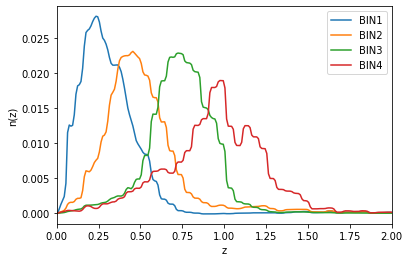

In [43]:
plt.xlim(0,2)
plt.plot(z,nz1,label="BIN1")
plt.plot(z,nz2,label="BIN2")
plt.plot(z,nz3,label="BIN3")
plt.plot(z,nz4,label="BIN4")
plt.xlabel('z')
plt.ylabel('n(z)')
plt.legend()
plt.savefig("nz_DES.png")

In [44]:
nztot = nz1 + nz2 + nz3 + nz4

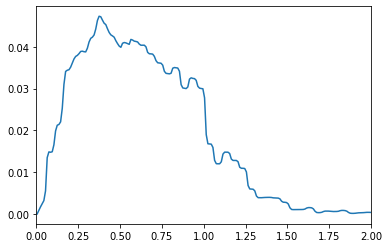

In [45]:
plt.xlim(0,2)
plt.plot(z,nztot)
cond = np.where(z<2.0)
z = z[cond]
nztot=nztot[cond]

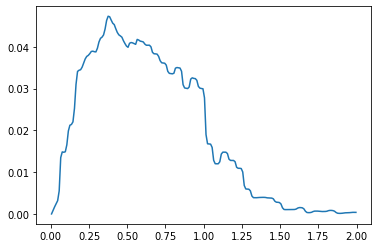

In [49]:
plt.plot(z,nztot)

In [48]:
np.savetxt("nz_DESy3_binscombined.txt",np.transpose([z,nztot]))